In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import PyWGCNA

In [2]:
txl_human = pd.read_table('/nfs_data/leity/poj/ncORF_human_mouse/results/human_RPF_counts_norm_cds_ncorf_all.tsv')
txl_human

,Aortic EC,Atrial fibroblasts,B721.221,BJ cell,Brain,Cardiac fibroblasts,Coronary artery EC,Epidermal melanocytes,Erythroid,ESC,...,MOLM-13,PC3,Skin fibroblasts,Testis,U2OS,Umbilical vein EC,Vascular smooth muscle,uid,len,gtype
0,636.652571,274.992259,286.940467,1297.775633,64.508457,59.414619,220.742444,193.118655,3784.019480,1382.236256,...,351.618001,2293.477192,950.299898,310.385083,592.665856,272.732280,59.424678,ENSG00000160072,4098,CDS
1,3.167426,39.284608,4.333513,5.149903,778.263315,8.831903,2.283543,64.875798,0.000000,33.487167,...,0.000000,10.180891,114.118983,118.157958,37.491323,0.000000,425.037527,ENSG00000142611,8698,CDS
2,611.313165,872.506303,506.401945,1158.728244,620.113550,399.844328,938.535978,694.020168,1638.663706,421.795806,...,225.396155,2289.775050,1673.399274,496.439778,442.700566,936.776092,301.152181,ENSG00000157911,2835,CDS
3,2790.502066,4932.885828,545.094025,3118.781443,2053.866020,3887.241596,2067.367167,2421.526891,2926.955239,2247.915148,...,3876.813861,1747.411194,8817.247630,2310.252608,1286.065973,2000.036720,2206.770668,ENSG00000157933,6083,CDS
4,3097.742362,2364.836427,3695.248425,3202.209876,2734.326191,2015.681096,2932.068603,2069.990588,3465.989353,2196.615658,...,2208.882316,1757.592085,2207.683605,1368.516049,2431.634161,3268.834718,2366.915139,ENSG00000142655,1922,CDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32897,22.171980,10.669894,195.936694,10.299807,29.549035,5.218852,4.567085,98.068067,10.780682,2.849972,...,0.000000,9.255356,1.037445,30.862153,28.402517,15.810567,25.179948,4_6986980_6986942_-,39,ncORF
32898,12.669703,0.000000,143.315465,8.239845,0.000000,0.000000,3.805904,3.017479,10.780682,1.424986,...,0.000000,12.031963,2.074891,12.344861,36.733922,15.810567,0.000000,7_105014024_105013986_-,39,ncORF
32899,573.304057,278.387225,2079.467157,673.607353,84.069085,269.373036,438.440165,304.765378,1401.488696,470.245324,...,9.015846,572.906530,834.106024,164.010300,463.150378,446.648517,701.009760,2_232550702_232550728_+,27,ncORF
32900,0.000000,0.484995,74.907867,2.059961,0.000000,0.401450,1.522362,0.000000,5.390341,2.137479,...,9.015846,4.627678,3.112336,5.290655,3.408302,3.952642,0.000000,19_52601315_52601338_+,24,ncORF


In [3]:
cnts = txl_human.drop(columns=['uid', 'len', 'gtype'])
print((cnts > 10).sum(axis=1).value_counts().sort_index())
good_genes = (cnts > 10).sum(axis=1) > cnts.shape[1]/2
print(good_genes.value_counts())

txl_human = txl_human[good_genes]
print(txl_human.shape)

0      1236
1       986
2       767
3       627
4       591
5       601
6       567
7       461
8       495
9       479
10      394
11      420
12      392
13      423
14      407
15      419
16      415
17      412
18      411
19      425
20      449
21      483
22      486
23      527
24      620
25      664
26      764
27      995
28     1357
29     2839
30    12790
Name: count, dtype: int64
True     23637
False     9265
Name: count, dtype: int64
(23637, 33)


In [4]:
adata = ad.AnnData(np.log1p(txl_human.drop(columns=['uid', 'len', 'gtype']).to_numpy().T))
adata.obs['tissue'] = txl_human.columns.difference(['uid', 'gtype', 'len']).to_list()
adata.var[['gtype', 'len']] = txl_human[['gtype', 'len']]
adata.var_names = txl_human['uid']
adata

AnnData object with n_obs × n_vars = 30 × 23637
    obs: 'tissue'
    var: 'gtype', 'len'

In [5]:
wdata = PyWGCNA.WGCNA(name='wgcna_ncorf_cds_human', anndata=adata, outputPath='./tmp/')
wdata.geneExpr.to_df().head(5)

uid,ENSG00000160072,ENSG00000142611,ENSG00000157911,ENSG00000157933,ENSG00000142655,ENSG00000149527,ENSG00000171621,ENSG00000142583,ENSG00000074800,ENSG00000116786,...,19_58327224_58327066_-,9_5628869_5577442_-,8_140024076_140023933_-,7_92854937_92916939_+,7_150337507_150342197_+,11_123062988_123063104_+,6_79537646_79538750_+,1_146052219_146052160_-,4_6986980_6986942_-,2_232550702_232550728_+
0,636.652571,3.167426,611.313165,2790.502066,3097.742362,0.000000,1213.124054,0.000000,277495.000565,1612.219695,...,259.728910,25.339406,76.018217,6.334851,0.000000,12.669703,41.176534,874.209501,22.171980,573.304057
1,274.992259,39.284608,872.506303,4932.885828,2364.836427,33.464666,2382.781248,562.109397,171360.431842,2891.056181,...,109.608907,43.649565,53.834463,28.614715,13.094869,11.639884,23.279768,281.297196,10.669894,278.387225
2,286.940467,4.333513,506.401945,545.094025,3695.248425,0.619073,94.718212,2020.036122,285674.771232,2789.853749,...,88.837016,1669.950180,131.862609,9.286099,61.907328,342.347525,24.762931,2558.320341,195.936694,2079.467157
3,1297.775633,5.149903,1158.728244,3118.781443,3202.209876,6.179884,1412.103487,95.788202,218813.211638,3816.078351,...,83.428434,27.809478,79.308511,10.299807,7.209865,16.479691,19.569633,801.324955,10.299807,673.607353
4,64.508457,778.263315,620.113550,2053.866020,2734.326191,1665.566730,522.726590,3539.225255,101337.791046,5173.994399,...,3.745652,58.265703,218.080202,17.479711,32.046136,12.901691,41.202175,33.710871,29.549035,84.069085


Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



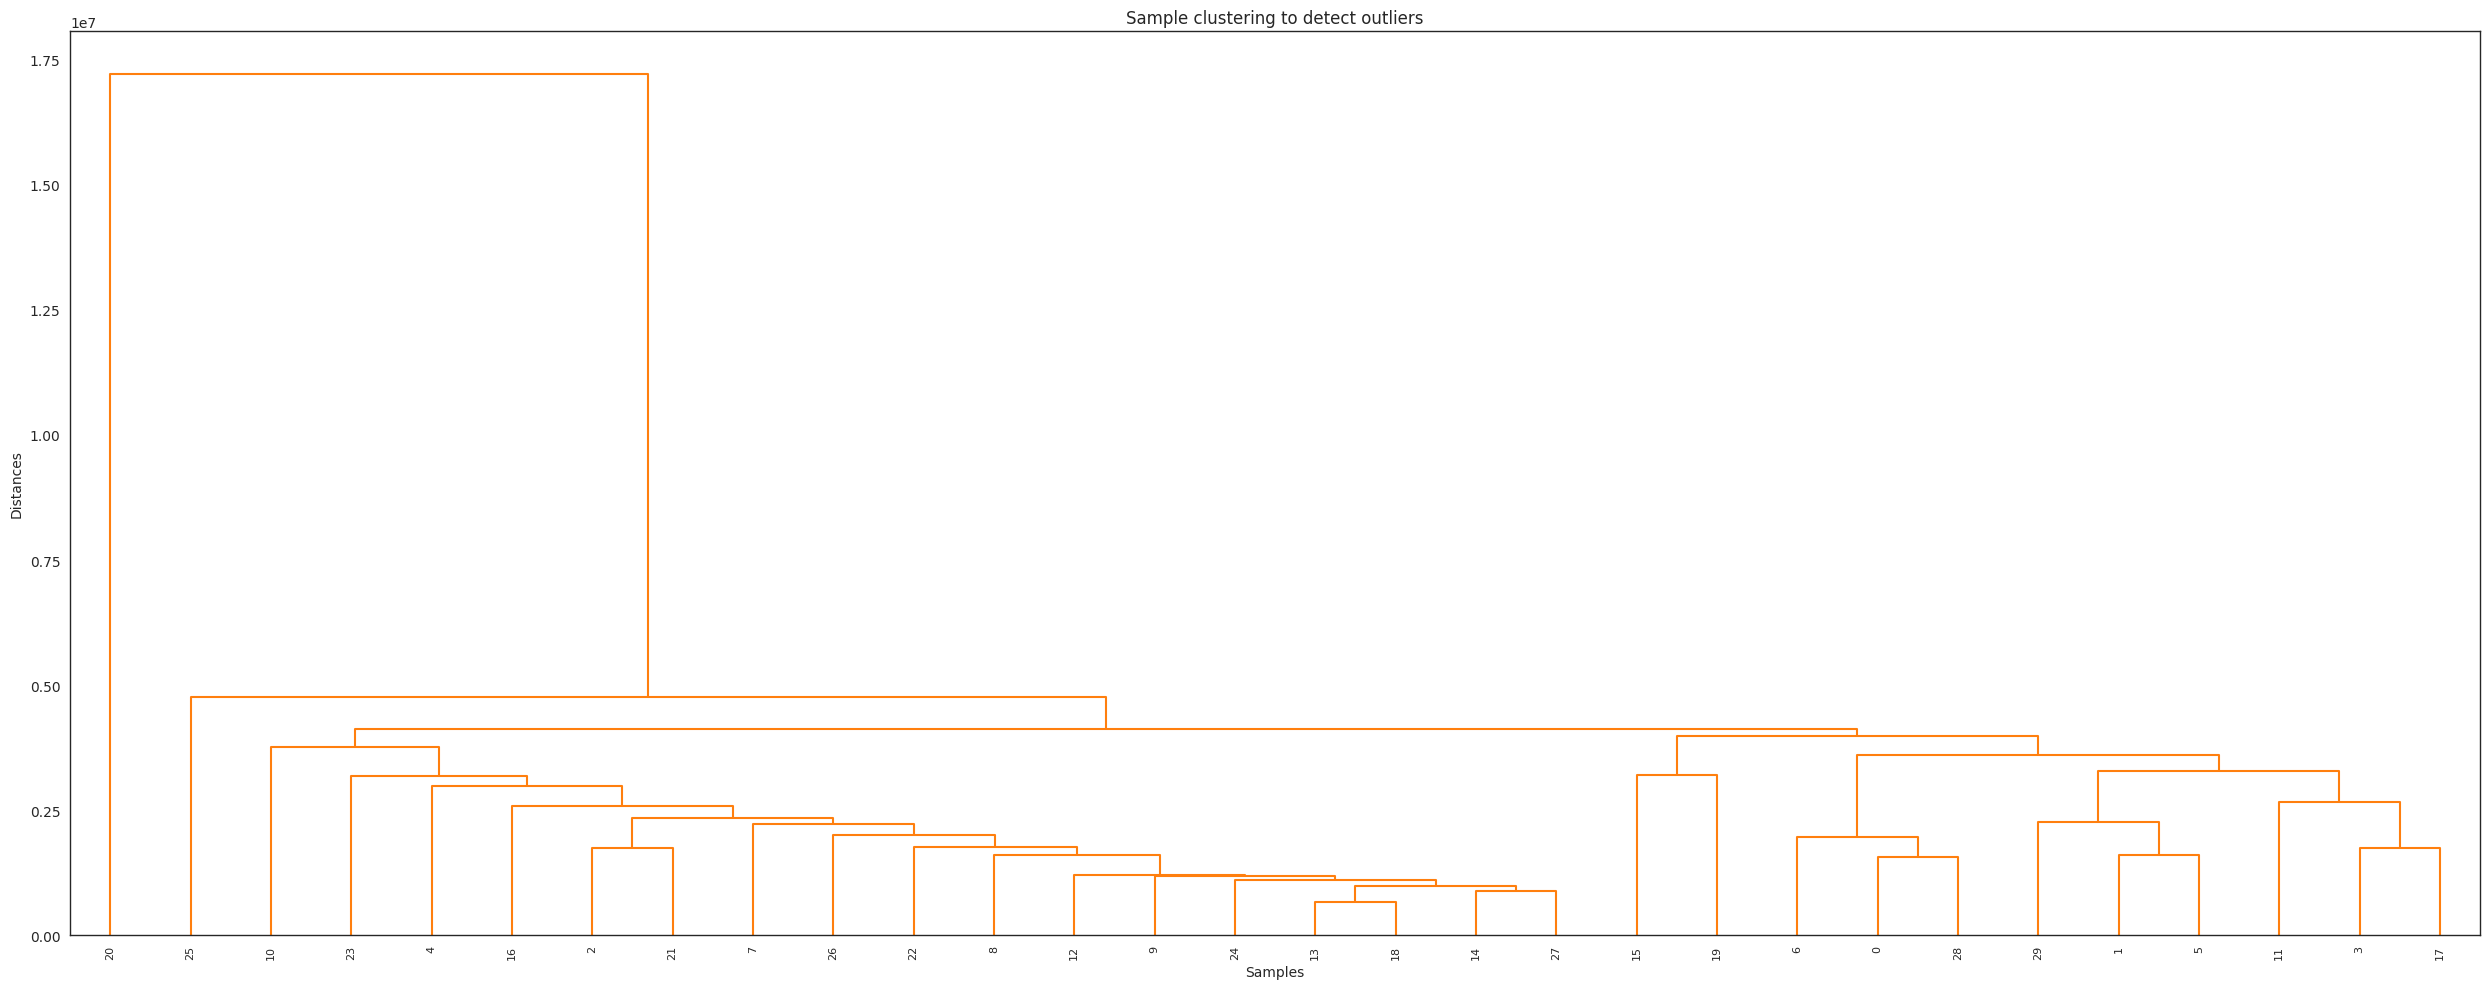

In [6]:
wdata.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1892
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.010244  0.274149       0.913946   2579.89814  2469.308696   
1       2  0.299894  -0.97108       0.838395  1018.562492   898.919726   
2       3  0.721927  -1.40844       0.909586    518.98277   408.742793   
3       4  0.858008 -1.524304       0.931668   308.783435   212.989134   
4       5  0.896087 -1.514707       0.922894   203.802289   121.568928   
5       6  0.900398 -1.473017         0.9052   144.771431    74.451158   
6       7  0.891959 -1.421588       0.880966   108.564091    47.354417   
7       8  0.988805 -1.285812       0.985607    84.834403    31.275716   
8       9  0.993281 -1.226696       0.994894    68.452733    21.294684   
9      10  0.994307 -1.223675        0.99397    56.662497    14.770095   
10     11  0.990438 -1.220891       0.987893    47.883139    10.410451   
11     13

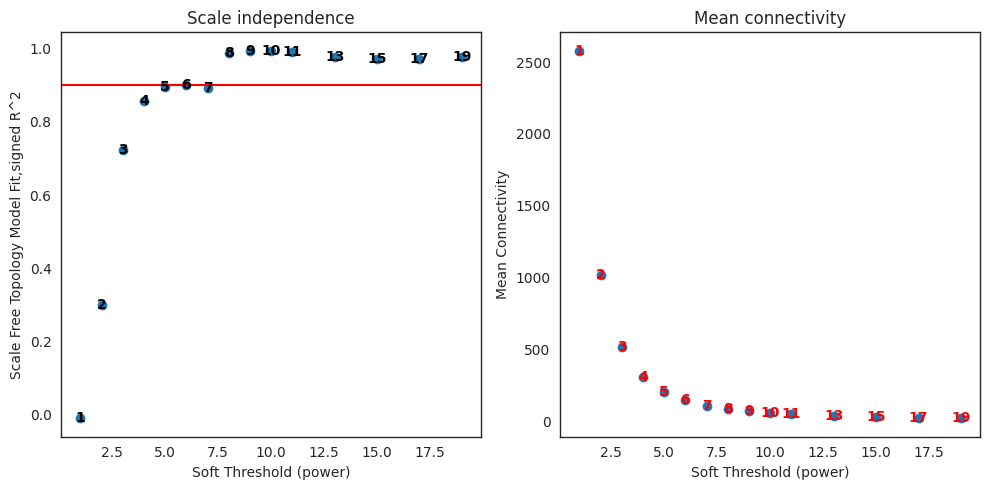

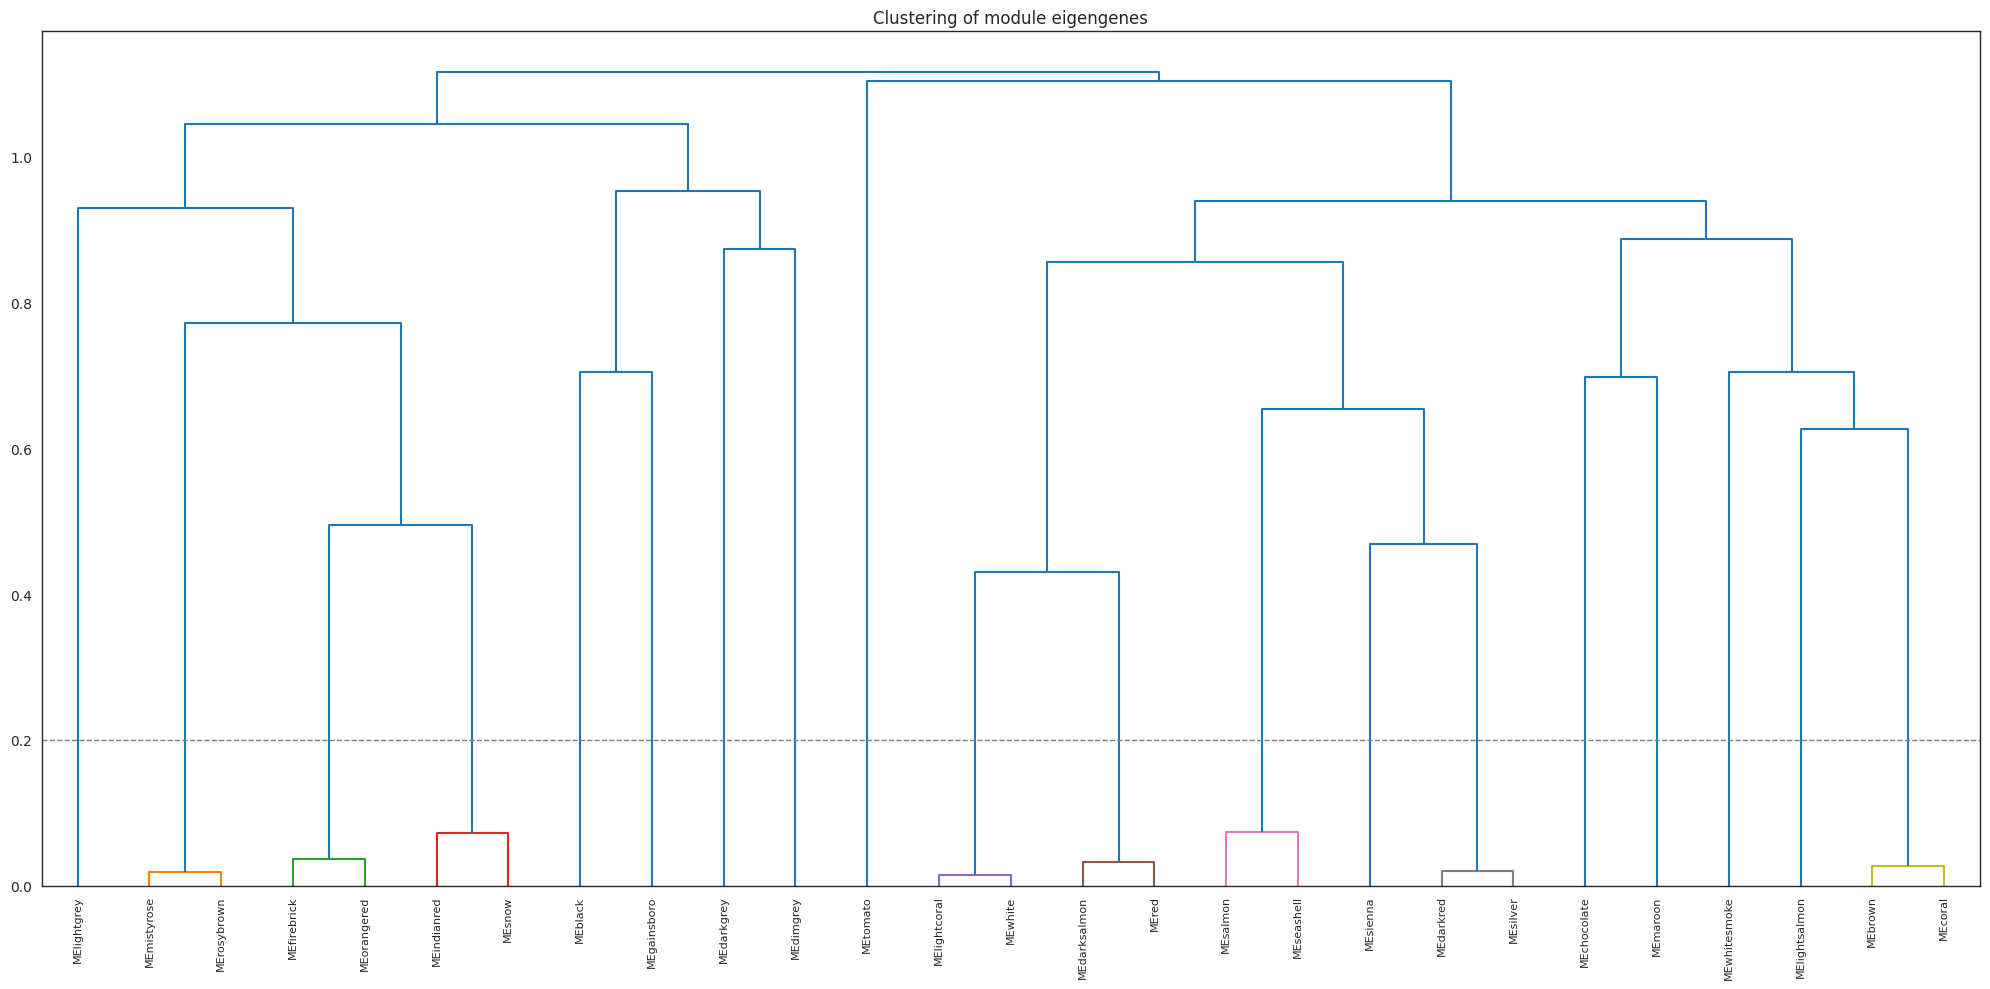

In [7]:
wdata.findModules()

In [8]:
wdata.saveWGCNA()

Saving WGCNA as wgcna_ncorf_cds_human.p


In [9]:
wdata.sft

,Power,SFT.R.sq,slope,truncated R.sq,mean(k),median(k),max(k)
0,1,0.010244,0.274149,0.913946,2579.89814,2469.308696,4809.498651
1,2,0.299894,-0.97108,0.838395,1018.562492,898.919726,2634.996805
2,3,0.721927,-1.40844,0.909586,518.98277,408.742793,1777.466566
3,4,0.858008,-1.524304,0.931668,308.783435,212.989134,1337.583878
4,5,0.896087,-1.514707,0.922894,203.802289,121.568928,1064.517211
5,6,0.900398,-1.473017,0.9052,144.771431,74.451158,887.60647
6,7,0.891959,-1.421588,0.880966,108.564091,47.354417,757.460615
7,8,0.988805,-1.285812,0.985607,84.834403,31.275716,657.38965
8,9,0.993281,-1.226696,0.994894,68.452733,21.294684,578.096507
9,10,0.994307,-1.223675,0.99397,56.662497,14.770095,541.57144


In [10]:
wdata.TOMType

'signed'

In [11]:
wdata.TOM

uid,ENSG00000160072,ENSG00000142611,ENSG00000157911,ENSG00000157933,ENSG00000142655,ENSG00000149527,ENSG00000171621,ENSG00000142583,ENSG00000074800,ENSG00000116786,...,19_58327224_58327066_-,9_5628869_5577442_-,8_140024076_140023933_-,7_92854937_92916939_+,7_150337507_150342197_+,11_123062988_123063104_+,6_79537646_79538750_+,1_146052219_146052160_-,4_6986980_6986942_-,2_232550702_232550728_+
uid,,,,,,,,,,,,,,,,,,,,,
ENSG00000160072,1.000000,1.804706e-05,0.002071,0.000002,0.000097,1.284244e-06,6.764404e-09,1.383505e-06,1.869556e-03,0.000178,...,5.443587e-05,0.000095,2.278100e-07,6.594559e-04,0.000971,0.000003,0.000025,8.894171e-03,0.000014,1.203570e-03
ENSG00000142611,0.000018,1.000000e+00,0.000001,0.000009,0.000001,1.821144e-01,8.574845e-06,1.346156e-04,2.819769e-07,0.003504,...,3.417955e-07,0.000008,8.269263e-03,1.216706e-06,0.000105,0.000008,0.001180,1.505522e-07,0.000017,5.867312e-07
ENSG00000157911,0.002071,1.315140e-06,1.000000,0.000863,0.000056,2.002355e-05,1.850200e-05,1.116936e-06,9.289494e-07,0.000346,...,1.237472e-03,0.000182,9.192294e-05,5.013727e-05,0.000407,0.000007,0.000043,1.926180e-03,0.000026,4.690730e-03
ENSG00000157933,0.000002,8.793918e-06,0.000863,1.000000,0.000010,3.641305e-05,4.702572e-03,3.174108e-05,1.523811e-05,0.001708,...,1.344888e-04,0.000003,4.160698e-06,5.164061e-06,0.000002,0.000002,0.000161,4.723255e-06,0.000001,7.865413e-05
ENSG00000142655,0.000097,1.380017e-06,0.000056,0.000010,1.000000,4.019850e-05,3.747557e-05,6.859635e-05,1.411793e-05,0.000014,...,5.778925e-05,0.033147,3.670900e-06,8.472285e-07,0.000013,0.006849,0.000015,1.873683e-03,0.011765,1.995758e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11_123062988_123063104_+,0.000003,7.716050e-06,0.000007,0.000002,0.006849,3.531382e-05,9.413973e-06,1.548343e-03,1.845375e-04,0.000010,...,2.640252e-05,0.349787,3.017749e-04,2.736146e-06,0.000971,1.000000,0.000075,9.324739e-03,0.123799,3.529686e-02
6_79537646_79538750_+,0.000025,1.180070e-03,0.000043,0.000161,0.000015,6.078757e-03,5.166601e-05,1.861473e-03,1.867040e-07,0.000015,...,1.166359e-04,0.000306,7.200448e-04,2.314321e-06,0.001337,0.000075,1.000000,4.062713e-05,0.000311,2.792941e-03
1_146052219_146052160_-,0.008894,1.505522e-07,0.001926,0.000005,0.001874,1.238664e-07,3.746213e-08,7.226422e-07,2.316646e-04,0.000119,...,1.885895e-04,0.085908,1.207352e-05,8.780236e-04,0.001822,0.009325,0.000041,1.000000e+00,0.024651,4.359560e-02


In [12]:
wdata.datExpr.var.head()

,gtype,len,dynamicColors,moduleColors,moduleLabels
uid,,,,,
ENSG00000160072,NaN,NaN,darkred,darkred,4
ENSG00000142611,NaN,NaN,gainsboro,gainsboro,8
ENSG00000157911,NaN,NaN,darkred,darkred,4
ENSG00000157933,NaN,NaN,indianred,indianred,9
ENSG00000142655,NaN,NaN,darkgrey,darkgrey,3


In [13]:
# check equal arrangement
print((wdata.TOM.index == wdata.adjacency.index).all(),
      (wdata.TOM.columns == wdata.adjacency.columns).all())
# get correlation, adjacency, and TOM
tom = wdata.TOM.melt(ignore_index=False, var_name='uid2', value_name='tom').reset_index(names='uid1')
adjacency = wdata.adjacency.melt(ignore_index=False, var_name='uid2', value_name='adjacency').reset_index(names='uid1')
tom['adjacency'] = adjacency['adjacency']
del adjacency

True True


In [14]:
results = tom[(tom.tom > 0.05) | (tom.adjacency > 0.05)]
results.shape

(12637063, 4)

In [15]:
results.to_csv('results/human_wgcna_ncorf_cds_adjacency_tom.tsv', sep='\t', index=False)

In [16]:
modules = wdata.datExpr.var.copy()
modules.drop(columns=['gtype', 'len'], inplace=True)
modules.reset_index(inplace=True)
modules.to_csv('results/human_wgcna_ncorf_cds_modules.tsv', sep='\t', index=False)